# Lab 8: Variance of Sample Means and Correlation

In this lab we will learn about [the variance of sample means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) as well as ways to understand and quantify [the association between two variables](https://inferentialthinking.com/chapters/15/1/Correlation.html).

In [ ]:
name = ...

In [1]:
from gofer.ok import check
Temple_color = '#9E1B34'
import numpy as np
import scipy.stats
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
user = os.getenv('JUPYTERHUB_USER')
!pip install nbformat
import nbformat as nbf
notebook = os.path.basename(globals()['__session__'])
import glob
notebooks = glob.glob('*.ipynb')
notebook = max(notebooks, key=os.path.getmtime)
from test_open import *

## 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

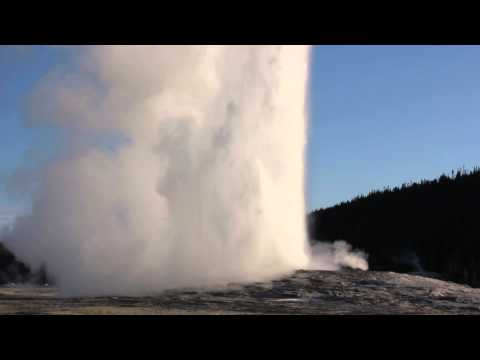

In [2]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it erupts.  To predict one variable from another, the first step is to understand the association between them.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes
- **wait**: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [ ]:
faithful = Table.read_table("faithful-new.csv")
faithful

### <font color=blue> **Question 1.** </font>

Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column corresponding to the independent variable on the horizontal axis. The predictor column is the independent or often labeled x variable. First we will make a scatter plot of the Old Faithful data.

In [ ]:
faithful.scatter(...)

### Example: To plot a scatter plot you need arrays from columns of data
See example below to examine the Philadelphia Phillies winning percentage, `PCT`, as a function of year, `YEAR`.

In [ ]:
# EXAMPLE DATA AND SCATTER PLOT
exampledata = Table().with_columns( \
     'YEAR', np.arange(2013,2025,1), \
     'PCT', make_array(.451,.451,.389,.438,.407,.494,.500,.467,.506,.537,.556,.586))
exampledata

In [ ]:
plt.scatter(exampledata.column('YEAR'),exampledata.column('PCT'),color="red") # need to use each column as an array to plot
plt.xlabel("Year")
plt.ylabel("Winning %")
#plt.show()

#### Regression Line
We can fit the observed trend using linear regression. We seek to understand the fundamental priciples behind this important manner of  fitting data.

In [ ]:
plt.scatter(exampledata.column('YEAR'),exampledata.column('PCT'),color="red") # need to use each column as an array to plot
plt.xlabel("Year")
plt.ylabel("Winning %")
# calculate equation for regression line
z = np.polyfit(exampledata.column('YEAR'),exampledata.column('PCT'), 1)
p = np.poly1d(z)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(exampledata.column('YEAR'), exampledata.column('PCT'))
plt.annotate("Slope: "+str(round(p[1],3))+"  Intercept: "+str(round(p[0],4))+"\n $R^2$: "+str(round(r_value,3)),xy=(2014,0.52)) # Annotate with slope and intercept
# add regression line to plot
plt.plot(exampledata.column('YEAR'), p(exampledata.column('YEAR')),color="blue", linewidth=3, linestyle="--")
plt.show()

#### Second example: Organic alcohol molecular weight and carbon chain length and their affect on boiling point
- Hypothesis: As alcohol molecular eeight increases boiling point will increase due to greater dispersion forces
- Null hypothesis: Molecular weight does not affect boiling point, only random variation. Slope randomly varies about zero for different molecular weights <br>
Two example butanol isomers are shown below

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules

In [ ]:
Chem.MolFromSmiles("CCCCO") #n-butanol; Molecular Weight = 74.12 g/mol 117.7°C = 391 K

In [ ]:
Chem.MolFromSmiles("CC(C)CO") #iso-butanol; Molecular Weight = 74.12 g/mol; bp = 108 °C = 381 K

In [ ]:
data_file = 'ROH_data.csv'
ROH_data = Table().read_table(data_file)
ROH_data

In [ ]:
plt.scatter(ROH_data['MW'],ROH_data['bp'],color = Temple_color, s=10*ROH_data['carbons'])
plt.xlabel('MW [g/mol]')
plt.ylabel('bp [K]')
plt.show()

#### Regression Line
We can fit the observed trend using linear regression. We seek to understand the fundamental priciples behind this important manner of  fitting data.

In [ ]:
plt.scatter(ROH_data['MW'],ROH_data['bp'],color = Temple_color,s=10*ROH_data['carbons']) # need to use each column as an array to plot
plt.xlabel('MW [g/mol]')
plt.ylabel('bp [K]')
# calculate equation for regression line
z = np.polyfit(ROH_data['MW'],ROH_data['bp'], 1)
p = np.poly1d(z)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ROH_data['MW'],ROH_data['bp'])
plt.annotate("Slope: "+str(round(p[1],2))+"  Intercept: "+str(round(p[0],4))+"\n $R^2$: "+str(round(r_value,3)),xy=(35,510)) # Annotate with slope and intercept
# add regression line to plot
plt.plot(ROH_data['MW'], p(ROH_data['MW']),color="blue", linewidth=3, linestyle="--")
plt.show()

What does the slope mean? Slope is the (change in y)/(change in x) so in this case the (change in boiling point)/(change in MW).
<br><font color=green>**Question:** Using the slope and the graph above what would you expect the change in boiling point to be for an increase in MW from 100 g/mol to 120 g/mol?

In [ ]:
bp_change = ...

In [ ]:
check('tests/q1a.py')

## <font color='green'>Old Faithful data</font>
#### Now try to plot the `faithful` data

In [ ]:
faithful.stats() # Helpful check on data, not neccessary in this case

In [ ]:
plt.scatter(faithful.column('duration'), faithful.column('wait'))
plt.xlabel("duration")
plt.ylabel("wait")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

##### Now try yourself, plot the reverse `wait`  versus  `duration`

In [ ]:
plt.scatter(... , ...)
plt.savefig("scatter_reverse.png")
plt.show()

**<font color=blue> What trend do you see in the data? <font>**
Discuss and include an estimate of the the slope<br>
Use the markdown cell below for your answer. 

#### Save notebook before check

In [ ]:
ck=check_open('tests/q1-open.txt',notebook)
check('tests/q1.py')

### <font color=blue> **Question 2.** </font>

Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?  You may want to consult [the textbook chapter 15](https://inferentialthinking.com/chapters/15/1/Correlation.html#the-correlation-coefficient) for the definition of "linearly related."

<font color='red'>*Write your answer here, replacing this text.*

Standard units makes the analysis of the relationship between duration and wait more straightforward. 
First, we'll plot the data in standard units.  Recall that, if `nums` is an array of numbers, then

    (nums - np.mean(nums)) / np.std(nums)

is an array of those numbers in standard units.

### <font color=blue> **Question 3.** </font>
Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named `"duration (standard units)"` and `"wait (standard units)"`.

In [ ]:
duration_mean = ...
duration_std = ...
wait_mean = ...
wait_std = ...

faithful_standard = Table().with_columns(
    "duration (standard units)", ...,
    "wait (standard units)", ...)
faithful_standard

In [ ]:
check('tests/q3.py')

### <font color=blue> **Question 4.** </font>
Plot the data again, but this time in standard units.

In [ ]:
# Review from above how plot a scatter plot
plt.scatter(faithful_standard.column(...), ...)
plt.show()

You'll notice that this plot looks exactly the same as the last one!  The data really are different, but the axes are scaled differently.  (The method `scatter` scales the axes so the data fill up the available space.)  So it's important to read the ticks on the axes.

### <font color=blue> **Question 5.** </font>

Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

Assign your answer to `closest_correlation`.

In [ ]:
closest_correlation = ...

In [ ]:
check('tests/q5.py')

### <font color=blue> **Question 6.** </font>
Compute the correlation `r`.  *Hint:* Use `faithful_standard`.  Section [15.1.2](https://inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.

In [ ]:
r = ...
r

In [ ]:
check('tests/q6.py')

### The regression line
Recall that the correlation is the slope of the regression line when the data are put in standard units.

The next cell plots the regression line in standard units:

$$\text{waiting time (standard units)} = r \times \text{eruption duration (standard units)}.$$

Then, it plots the original data again, for comparison.

In [ ]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line")
    plt.legend(bbox_to_anchor=(1.5, 0.8))


plot_data_and_line(
    faithful_standard,
    "duration (standard units)",
    "wait (standard units)",
    [-2, -2 * r],
    [2, 2 * r],
)

How would you take a point in standard units and convert it back to original units?  We'd have to "stretch" its horizontal position by `duration_std` and its vertical position by `wait_std`.

That means the same thing would happen to the slope of the line.

Stretching a line horizontally makes it less steep, so we divide the slope by the stretching factor.  Stretching a line vertically makes it more steep, so we multiply the slope by the stretching factor.

### <font color=blue> **Question 7.** </font>
What is the slope of the regression line in original units?

(If the "stretching" explanation is unintuitive, consult section [15.2.5](https://inferentialthinking.com/chapters/15/2/Regression_Line.html#the-equation-of-the-regression-line) in the textbook.)

In [ ]:
slope = ...
slope

We know that the regression line passes through the point `(duration_mean, wait_mean)`.  You might recall from high-school algebra that the equation for the line is therefore:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

After rearranging that equation slightly, the intercept turns out to be:

In [ ]:
intercept = slope*(-duration_mean) + wait_mean
intercept

In [ ]:
check('tests/q7.py')

### <font color=blue> **Question 7. Discussion** </font>
Based on your regression analysis, if you were a ranger at the park and a tourist just witnessed an eruption lasting 4 minutes, when whould you tell them to come back so as not to miss the next one? (Explain your reasoning in the markdown cell below.)

This is a test of the incident that we all know about This is a test of the incident that we all know about

#### Save notebook before check

In [7]:
check('tests/q7d.py')

![Geezers erupt without warning cartoon](geezers.png)

## 2. Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean. Some of the sample means are higher, and some lower, but the deviations from the population mean are roughly symmetric on either side, as we have seen repeatedly. Formally, probability theory shows that the sample mean is an unbiased estimate of the population mean.

In our simulations, we also noticed that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the variability of the sample mean and develop a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco in 2014. The mean salary reported by the city government was about $75463.92.

In [ ]:
salaries = Table.read_table('sf_salaries_2014.csv').select("salary")
salaries

In [ ]:
salary_mean = np.mean(salaries.column('salary'))
salary_mean

In [ ]:
salaries.hist('salary', bins=np.arange(0, 300000+10000*2, 10000))
plt.scatter(salary_mean, 0, marker='^', color='red', s=1000);

### <font color=blue> **Question 8.** </font>
Clearly, the population does not follow a normal distribution. Keep that in mind as we progress through these exercises.

Let's take random samples and look at the probability distribution of the sample mean. As usual, we will use simulation to get an empirical approximation to this distribution.

We will define a function `simulate_sample_mean` to do this, because we are going to vary the sample size later. The arguments are the name of the table, the label of the column containing the variable, the sample size, and the number of simulations.

Complete the function `simulate_sample_mean`.

In [ ]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = ...
        new_sample_mean = ...
        ...

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    fig, ax = plt.subplots()
    ax.hist(means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    
    textstr = '\n'.join((
    r'$\mathrm{Sample  Size}=%.2f$' % (sample_size, ),
    r'$\mathrm{Population  Mean}=%.2f$' % (np.mean(table.column(label)), ),
    r'$\mathrm{Average Of Sample Means}=%.2f$' % (np.mean(means), ), 
    r'$\mathrm{Population SD}=%.2f$' % (np.std(table.column(label)), ),
    r'$\mathrm{SD Of Sample Means}=%.2f$' % (np.std(means), )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.75, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    return means

In [ ]:
check('tests/q8.py')

### <font color=blue> **Question 9.** </font>
In the following cell, we will create a sample of size 100 from the salaries table and graph it using our new `simulate_sample_mean` function.

In [ ]:
small_sample_size = simulate_sample_mean(salaries, 'salary', 100, 10000) 
plt.xlim(50000, 100000)

In the following two cells, simulate the mean of a random sample of 400 salaries and 625 salaries, respectively. In each case, perform 10,000 repetitions of each of these processes. Don't worry about the `plots.xlim` line – it just makes sure that all of the plots have the same x-axis. 

In [ ]:
...
plt.xlim(50000, 100000)

In [ ]:
...
plt.xlim(50000, 100000)

We can see the Central Limit Theorem in action – the histograms of the sample means are roughly normal, even though the histogram of the salaries themselves is far from normal.

We can also see that each of the three histograms of the sample means is centered very close to the population mean. In each case, the "average of sample means" is very close to the population mean. Both values are provided in the printout above each histogram. As expected, the sample mean is an unbiased estimate of the population mean.

### <font color=blue> **Question 10.** </font>

Below, we'll look at what happens when we take a fixed sample, then bootstrap from it with different numbers of resamples. How does the distribution of the resampled means change?

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 500)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 1000)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 5000)
plt.xlim(50000, 100000)

In [ ]:
simulate_sample_mean(salaries, 'salary', 100, 10000)
plt.xlim(50000, 100000)

Assign the variable `bootstrap_sampled_SD` to the integer corresponding to your answer to the following prediction question:

When I increase the number of bootstrap samples that I take, for a fixed sample size, the SD of my sample mean will...

1. Increase
2. Decrease
3. Stay about the same
4. Vary widly

In [ ]:
bootstrap_sampled_SD = ...

In [ ]:
check('tests/q10.py')

### <font color=blue> **Question 10 discussion.** </font>
What did you notice about the sample means of the four bootstrapped samples above?

#### Save notebook before check

In [ ]:
check('tests/q10d.py')

### <font color=blue> **Question 11.** </font>
Next, let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. Which of the following is true? Again, assign the variable `pop_vs_sample` to the integer corresponding to your answer. To gain some intuition, you can run the simulation cells below.

1. Sample SD gets smaller with increasing sample size, SD of sample means gets smaller with increasing sample size
2. Sample SD gets larger with increasing sample size, SD of sample means stays the same with increasing sample size
3. Sample SD becomes more consistent with population SD with increasing sample size, SD of sample means gets smaller with increasing sample size
4. Sample SD becomes more consistent with populatoin SD with increasing sample size, SD of smaple means stays the same with increasing sample size

In [ ]:
pop_vs_sample = ...

In [ ]:
check('tests/q11.py')

Let's see what happens: First, we calculate the population SD so that we can compare the SD of each sample to the SD of the population.

In [ ]:
pop_sd = np.std(salaries.column("salary"))
pop_sd

Let's then how a small sample behaves. Run the following cells multiple times to see how the SD of the sample changes from sample to sample. Adjust the bins as necessary.

In [ ]:
sample_10 = salaries.sample(10)
sample_10.hist("salary")
print("Sample SD: ", np.std(sample_10.column("salary")))
means = simulate_sample_mean(sample_10, 'salary', 10, 1000)

In [ ]:
sample_200 = salaries.sample(200)
sample_200.hist("salary")
print("Sample SD: ", np.std(sample_200.column("salary")))
means = simulate_sample_mean(sample_200, 'salary', 200, 1000)

In [ ]:
sample_1000 = salaries.sample(1000)
sample_1000.hist("salary")
print("Sample SD: ", np.std(sample_1000.column("salary")))
means = simulate_sample_mean(sample_1000, 'salary', 1000, 1000)

Let's illustrate this trend. Below, you will see how the average absolute error of SD from the population changes with sample size (N).

In [ ]:
# Don't change this cell, just run it!
sample_n_errors = make_array()
for i in np.arange(10, 200, 10):
    sample_n_errors = np.append(sample_n_errors, np.average([abs(np.std(salaries.sample(i).column("salary"))-pop_sd)
                                                             for d in np.arange(100)]))
Table().with_columns("Average absolute error in SD", sample_n_errors, "N", np.arange(10, 200, 10)).plot("N", "Average absolute error in SD")

You should notice that the distribution of means gets spiker, and that the distribution of the sample increasingly looks like the distribution of the population as we get to larger sample sizes. 

### <font color=blue> **Question 11 discussion.** </font>
Is there a relationship between the sample size and absolute error in standard deviation? Identify this relationship – if you're having trouble, take a look at this [section](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) in our textbook about the variability of sample means.

#### Save notebook before check

In [ ]:
check('tests/q11d.py')

### <font color=blue> **Question 12.** </font>

At the end of each lab, please include a reflection. 
* How did this lab go? 
* Are you confident you could fit a line to a new data set?
* Were there questions you found especially challenging you would like your instructor to review in class? 
* How long did the lab take you to complete?

Share your feedback so we can continue to improve this class!

**Insert a markdown cell below this one and write your reflection on this lab.**

#### Save notebook before check

In [ ]:
check('tests/q12d.py')

## Submission

You're finished with lab 8! In order to successfully submit your assignment, follow these steps...
- Before you do anything, **Save Notebook** from the `File` menu. Please do this first before running the cell below,
- **run all the tests and verify that they all pass and run very last cell** (below), 
- **Review the notebook one last time** If you make any changes, please **Save** again.
- Download as an an .ipynb file and Save nd Export as an .html file and submit both on Canvas! 

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
checks = [1,'1a',3,5,6,7, '7d',8,10,'10d',11, '11d','12d']
total = len(checks)
for x in checks:
    print('Testing question {}: '.format(str(x)))
    g = check('tests/q{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/total)))

In [ ]:
print("Nice work ",name, user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)